# I. Dataset

### 1. Introduction:

**In this Portfolio 4 project, I will use a dataset from Kaggle called "Diabetes Dataset" from "Pima Indians". This dataset is the record of female diabetes patients from the "National Institute of Diabetes and Digestive and Kidney
Diseases".**

### 2. Description:

**This is a brief description of the attributes in the dataset:**<br><br>
*- Pregnancies: To express the Number of pregnancies*<br><br>
*- Glucose: To express the Glucose level in blood*<br><br>
*- BloodPressure: To express the Blood pressure measurement*<br><br>
*- SkinThickness: To express the thickness of the skin*<br><br>
*- Insulin: To express the Insulin level in blood*<br><br>
*- BMI: To express the Body mass index*<br><br>
*- DiabetesPedigreeFunction: To express the Diabetes percentage*<br><br>
*- Age: To express the age*<br><br>
*- Outcome: To express the final result 1 is Yes and 0 is No*

# II. Data Preprocessing and Data Exploration

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
dia = pd.read_csv('diabetes.csv')
dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print(f'Dataset shape: Rows: {dia.shape[0]}   Columns: {dia.shape[1]}')

Dataset shape: Rows: 768   Columns: 9


In [4]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


*-Briefly looking through a few information of the dataset, we can see that this dataset has 9 attributes and 768 records in total.*<br><br>
*-Fortunately, it is shown in the info() function that there is no missing value in this dataset. So, we do not need to fill or drop any record.*<br><br>

**Now let's look through the records to see if there is any outliers, and then remove it.**

In [5]:
dia.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


*We need to use boxplots to spot the outliers. However, we can see that "Outcome" is a kind of label, so we don't need boxplot for it. Moreover, "Pregnancies", "Insulin" and "DiabetesPedigreeFunction" have quite different scales from the others, so we will make different graph for these two attributes.*

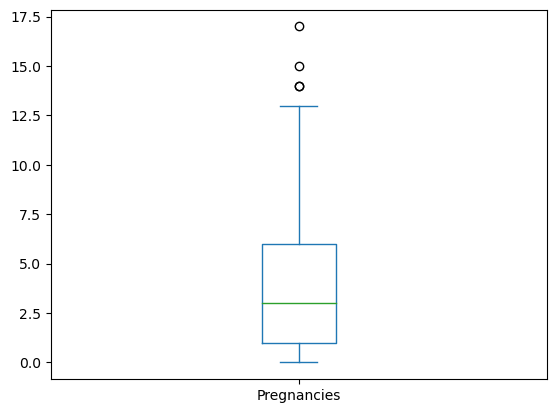

In [6]:
dia['Pregnancies'].plot(kind = 'box'); ##For attribute "Pregnancies"

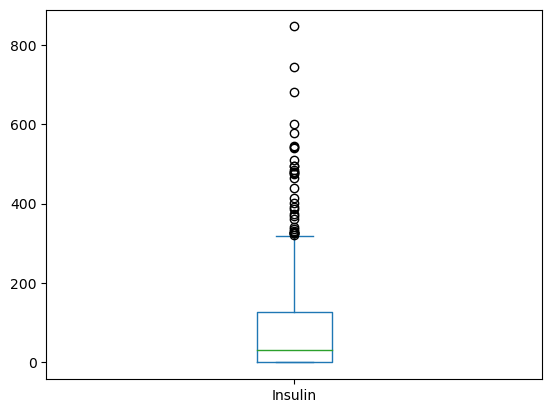

In [7]:
dia['Insulin'].plot(kind = 'box'); ##For attribute "Insulin"

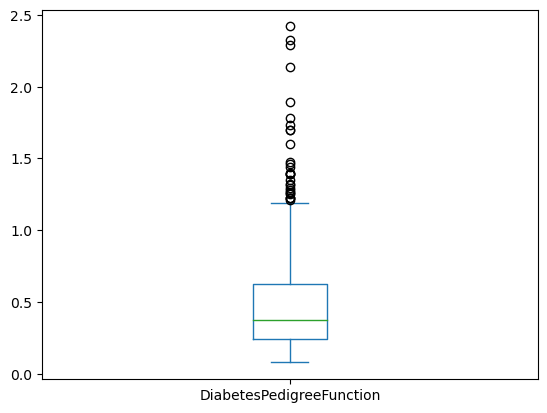

In [8]:
dia['DiabetesPedigreeFunction'].plot(kind = 'box'); ##For attribute "DiabetesPedigreeFunction"

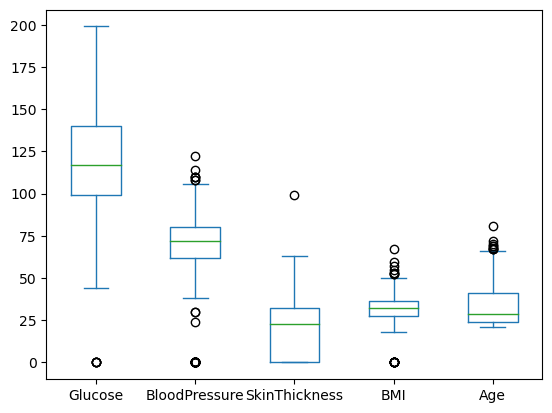

In [9]:
col = dia[['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Age']]
col.plot(kind = 'box'); ##For the other attributes

**From the above plots, we can conclude the outlier for each attributes are:**<br><br>
*- Pregnancies: > 13*<br>
*- Insulin: > 400*<br>
*- DiabetesPedigreeFunction: > 1.5*<br>
*- Glucose: < 25*<br>
*- BloodPressure: < 25*<br>
*- SkinThickness: > 75*<br>
*- BMI: > 50 and < 5*<br>
*- Age: >75*<br><br>
**Now we remove these outliers.**

In [10]:
remove_index = dia.loc[(dia['Pregnancies'] > 13) |
                        (dia['Insulin'] > 400) |
                        (dia['DiabetesPedigreeFunction'] > 1.5) |
                        (dia['Glucose'] < 25) |
                        (dia['BloodPressure'] < 25) |
                        (dia['SkinThickness'] > 75) |
                        ((dia['BMI'] > 50) & (dia['BMI'] < 5)) |
                        (dia['Age'] > 75)
                       ].index
dia = dia.drop(remove_index)
print(f'Dataset shape after removal: {dia.shape}')

Dataset shape after removal: (693, 9)


# III. Model Training

### 1. Linear Regression:

*In this section, we will train a model to diagnose if a patient has diabetes using the dataset.*<br><br>
*First, I will try something simple, I will train a Linear Regression Model.*

**Model Training:**

In [11]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

In [12]:
X = dia.iloc[:,:-1]
y = dia.iloc[:,-1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train);

**Model Evaluation:**

In [14]:
print('Report on train set:')
y_predict = reg.predict(X_train)
mse = ((np.array(y_train) - y_predict) ** 2).sum()/len(y_train)
r2 = r2_score(y_train, y_predict)
print("MSE:", mse)
print("R Squared:", r2)

Report on train set:
MSE: 0.1529467360684823
R Squared: 0.30068081270474034


In [15]:
print('Report on test set:')
y_predict = reg.predict(X_test)
mse = ((np.array(y_test) - y_predict) ** 2).sum()/len(y_test)
r2 = r2_score(y_test, y_predict)
print("MSE:", mse)
print("R Squared:", r2)

Report on test set:
MSE: 0.15229660827254976
R Squared: 0.3443576719175726


*In the report on train set we can see that the MSE is not quite close to 0, and R Squared is not quite close to 1. This means that the model is not accurate enough. Moreover, look into the report on test set, the scores is even worse. Therefore, we can say that the Linear Regression Model is underfitting.*<br><br>
*To fix this problem, we can train a more complex model.*

### 2. Classification Models:

*Diagnosing a diabetes patient can be considered as a classification work. Therefore, we should use classification models to improve performance of the model.*<br><br>
*Now let's try Logistic Regression Model, a simple model for classification.*

**A. Logistic Regression:**

**Model training:**

In [16]:
reg = linear_model.LogisticRegression()
reg.fit(X_train, y_train);

**Model Evaluation:**

*To evaluate this classifier model, we will use accuracy score and confusion matrix.*

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [18]:
y_pred = reg.predict(X_test)
print('Report on Logistic Regression Model:\n')
print(f'    Accuracy rate: {accuracy_score(y_test, y_pred)}')
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f'    Confusion matrix: TrueNev:{tn}   FalsePos:{fp}   FalseNev:{fn}   TruePos:{tp}')
print(f'    Precision rate: {tp / (tp + fp)}')

Report on Logistic Regression Model:

    Accuracy rate: 0.7697841726618705
    Confusion matrix: TrueNev:80   FalsePos:8   FalseNev:24   TruePos:27
    Precision rate: 0.7714285714285715


*As reported, the accuracy and precision score of this model is quite reasonable. However, it is just right above average, so this model is still not accurate enough.*<br><br>
*This may happen when there are too many feature and the model starts to learn from the noises. Therefore, we will perform feature selection and train the model once more to see if it is improved. In this report, I will use RFE feature selection model.*<br><br>
*We have 8 attributes in total for X, now I will try select only 4 best features to train the Logistic Regression Model.*

In [19]:
from sklearn.feature_selection import RFE
lr = linear_model.LogisticRegression()
rfe = RFE(estimator = lr, n_features_to_select = 4)
rfe.fit(X, y);
for i in range(len(X.columns)):
    print(f'{X.columns[i]}: {rfe.support_[i]}')

Pregnancies: True
Glucose: True
BloodPressure: False
SkinThickness: False
Insulin: False
BMI: True
DiabetesPedigreeFunction: True
Age: False


*The result shows that "Pregnancies", "Glucose", "BMI" and "DiabetesPedigreeFunction" is selected. Now we will train the Logistic Regression Model again using only these 4 features.*

**Model Training:**

In [20]:
X_new = dia[["Pregnancies", "Glucose", "BMI", "DiabetesPedigreeFunction"]]
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 42)
lr.fit(X_train, y_train)

LogisticRegression()

**Model Evaluation:**

In [21]:
y_pred = lr.predict(X_test)
print('Report on Logistic Regression Model:\n')
print(f'    Accuracy rate: {accuracy_score(y_test, y_pred)}')
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f'    Confusion matrix: TrueNev:{tn}   FalsePos:{fp}   FalseNev:{fn}   TruePos:{tp}')
print(f'    Precision rate: {tp / (tp + fp)}')

Report on Logistic Regression Model:

    Accuracy rate: 0.7697841726618705
    Confusion matrix: TrueNev:80   FalsePos:8   FalseNev:24   TruePos:27
    Precision rate: 0.7714285714285715


*Obviously, even when we select best features to train Logistic Regression Model, the results remain the same. Therefore, we can see that the problem are not from the noises. This shows that the model is still too simple for such dataset. We can conclude that linear models is not suitable for this dataset.*<br><br>

*To fix this, we will try a different classifier model: K-Nearest Neighbors (KNN).*

**B. K-Nearest Neighbors:**

**Parameter Tuning:**

*Since we do not know what is the value of K that gives the best performance on the model, we need to performm a parameter tuning technique to find the best K, and then we train the model using that value of K.*<br><br>
*In this report, I will use GridSearchCV for parameter tuning.*

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
grid_search = GridSearchCV(clf, {'n_neighbors': range(1, 200, 5)}, cv = 10, scoring = 'accuracy')
grid_search.fit(X, y)
print(f'Best K: {grid_search.best_estimator_}')

Best K: KNeighborsClassifier(n_neighbors=16)


*We can see that GridSearchCV tells us that K = 16 is the best K in this case. Let's take a look at the whole process to see how it's come to this conclusion.*

In [23]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.loc[cv_results['param_n_neighbors'] == 16]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
3,0.002994,0.000002,0.004044,0.00034,16,{'n_neighbors': 16},0.785714,0.771429,0.714286,0.681159,0.710145,0.782609,0.768116,0.811594,0.782609,0.782609,0.759027,0.039793,1


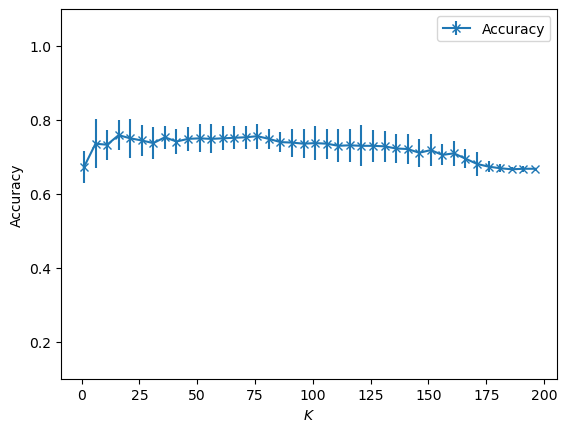

In [24]:
plt.errorbar(cv_results['param_n_neighbors'], cv_results['mean_test_score'], yerr= cv_results['std_test_score'], marker='x', label='Accuracy');
plt.ylim([0.1, 1.1])
plt.xlabel('$K$')
plt.ylabel('Accuracy')
plt.legend(loc='best');

*We can see from the above graph that the performance of K increases from 1 and reach the peak at 16, after that it starts decreasing continuosly. However, if we look into the mean test score of K = 16, it is only 0.795, not seems to be accurate enough for a medical diagnose system.*<br><br>
*Nevertheless, let's try training the model and evaluate it with unseen data to see how well it works.*

**Model Training:**

In [25]:
clf = clf = KNeighborsClassifier(n_neighbors = 16)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=16)

**Model Evaluation:**

*I will use K-fold cross validation technique to evaluate the model.*

In [26]:
from sklearn.model_selection import cross_val_score, KFold
KNN_scores = cross_val_score(clf, X_test, y_test, scoring='accuracy', cv = KFold(n_splits=10, shuffle=True))
print(f'Mean accuracy score: {KNN_scores.mean()}    Standard deviation: {KNN_scores.std()}')

Mean accuracy score: 0.7703296703296703    Standard deviation: 0.07576841396016788


*It is obvious that the performance for this model is even higher than expected. However, let's perform K-fold cross validation on the previous Logistic Regression Model, and compare the accuracy score to the KNN Model. Then, we will conclude which model is better.* 

In [27]:
lr_scores = cross_val_score(lr, X_test, y_test, scoring='accuracy', cv = KFold(n_splits=10, shuffle=True))
print(f'Mean accuracy score: {lr_scores.mean()}    Standard deviation: {lr_scores.std()}')

Mean accuracy score: 0.7906593406593407    Standard deviation: 0.08939173755795328


*Clearly, the Logistic Regression Model is the best model for the diagnose system until now with the accuracy up to 80%.*